In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import graphviz as gr

import cvxpy as cp

import statsmodels.formula.api as smf

# Abstract

Drive-thrus are the American way of dining. Therefore, companies need this part of the restaurant to operate at peak efficiency. One company in particular that excels in this is **Chick-fil-A**. Recently, Chick-fil-A has begun testing **mobile-thrus**, a designated drive-thru lane for mobile orders made through the Chick-fil-A app. In this post, we briefly review the history of the drive-thru for fast food restaurants. We further zoom in on Chick-fil-A's drive-thru strategy and operations. We then present an experimentation design for Chick-fil-A to validate this drive-thru pilot program using **Synthetic Difference-in-Difference (SDiD)**. We conclude by discussing possible strategic directions from our causal findings.

# Introduction

Although the drive-thru is a necessity for many fast-food chains today, it was not initially seen as a revolutionary concept. The first drive-thru is credited to Red's Giant Hamburger, a small restaurant in Missouri, in 1947 [@agate_incredible_2024]. The innovation's primary motivation was to transition from the traditional drive-in model to a faster system, allowing cars to pull up to a service window and leave promptly after receiving their food.

Word of the drive-thru model eventually spread to the West Coast, where burger chain **In-N-Out** operationalized and advanced the concept. In-N-Out innovated by inventing the two-way speaker system, which separated order placement from food pickup to speed up operations. Soon after, other chains like **Jack in the Box** and **Wendy's** adopted this two-way speaker drive-thru model. Despite this growing trend, larger chains such as McDonald's and Burger King did not implement their own drive-thrus until the mid-1970s. Today, drive-thrus are critical to the success of fast-food chains, estimated to generate approximately 62% of all revenue [@goyal_drive-thru_2025]. This places immense pressure on companies to meet the high expectations of the drive-thru model: speed, efficiency, and accuracy.

# Chick-fil-A

In 1946, brothers S. Truett Cathy and Ben Cathy opened the **Dwarf House** in Hapeville, Georgia [@chick-fil-a_2020]. The establishment was a typical diner, serving a variety of items like burgers, fries, and shakes. To differentiate the menu, S. Truett Cathy began experimenting with boneless chicken sandwich recipes. He eventually found the perfect combination, and the new sandwiches quickly became more popular than the burgers. Cathy decided to focus exclusively on this signature chicken sandwich and coined the name **Chick-fil-A** to reflect its high quality (inspired by the premium beef cut, fillet). The first official Chick-fil-A restaurant opened in Atlanta, Georgia, in 1967.

![The Chick-fil-A Sandwich](https://d1fd34dzzl09j.cloudfront.net/Images/CFACOM/PLP%20updates/Image%20Updates/OS_3Col2.png?la=en&h=-1&w=-1)

The first drive-thru Chick-fil-A opened in Greenville, South Carolina, in 1993. Since then, Chick-fil-A has grown into a fast-food powerhouse, generating approximately $8 billion in annual sales. A significant portion of this revenue is attributed to its drive-thru operations.

Chick-fil-A wasn't always known for its fast drive-thru service; in fact, it was once one of the slowest chains in the country. However, through a combination of strategic operational changes and technological innovations, the company has since become the industry standard for drive-thru efficiency.

## Drive-Thru Operations

In practice, drive-thru operations at each Chick-fil-A location are not identical; they vary based on factors like store layout and local demand. For this analysis, we will assume a standard operational structure and flow as depicted in Figure 1, which serves as a representative model for our discussion.

![Chick-fil-A Drive-Thru Diagram](drive_thru_1.jpg){#fig-drive-1}

Our Chick-fil-A restaurant, as shown in Figure 1, features a double-lane drive-thru. The process is as follows:

1. A car enters the drive-thru and chooses a lane.
2. The customer places their order with the designated order taker for that lane.
3. If paying with cash, the customer stops at a shared cashier station located between the two lanes.
4. The car proceeds to the delivery window, where an employee delivers the food.

Inside the restaurant, a team of baggers and beverage/milkshake station employees assemble the orders based on their contents.

## Analyzing the Drive-Thru via Queue Theory

Our drive-thru operation can be analyzed using tools from **queue theory** [@Erlang1917]. Below are some key parameters.

- Arrival Rate ($\lambda$): The average rate of customers arriving at the drive-thru. In our scenario, $\lambda$ = 2 customers per minute.
- Order Take Time (OTT): The average time it takes for customers to place their order. In our scneario, OTT = 30 seconds. 
- Service Rate ($\mu$): The average rate at which orders are processed and fulfilled (time from order placement to order delivery). In our scenario, $\mu$ = 2.33 customers per minute.

With two order takers and a single service window, the system's bottleneck is the service window, as it has the lowest service rate. Since the overall system's throughput is limited by this single service point, we can model the entire drive-thru as a **M/M/1 queue** using **Kendall notation** [@Kendall1953], where the service window represents the single server. This simplifies our analysis by focusing on the primary constraint on the system's capacity.

For our drive-thru to run efficiently, we want to ensure that certain key metrics are optimized. These metrics and the respective calculations are listed below.

- System Utilization ($\rho$): $\rho = \frac{\lambda}{\mu} = 85.8\%$
- Average Number of Customers in Queue ($L_{q}$): $L_{q} = \frac{\lambda^{2}}{\mu(\mu - \lambda)} = 5.2$
- Average Time in Queue ($W_{q}$): $W_{q} = \frac{L_{q}}{\lambda} = 2.6 \text{ mins}$
- Average Number of Customers in System ($L$): $L = \frac{\lambda}{\mu - \lambda} = 6.1$
- Average Time in System ($W$): $W = \frac{1}{\mu - \lambda} = 3.0 \text{ mins}$

Under the current system, the service window operates at around 86% capacity. On average, there are 5 cars waiting for their food, with each car spending an average of 2.5 minutes in the queue. The total average time a car spends in the system—from entering the drive-thru to receiving their food—is 3 minutes, with a total of 6 cars in the system on average. Overall, for peak hours, these are acceptable values that represent an efficient drive-thru.

## Chick-fil-A One

In 2012, Chick-fil-A released their own mobile app. This app allowed customers to order items from their mobile device and pick up their order in the lobby or via the drive-thru. In 2016, Chick-fil-A added an incentive to get the app by developing their **Chick-fil-A One** rewards program. Any customer could now sign up and earn rewards for their purchases through the app.

![Chick-fil-A One Rewards Program Benefits](https://res.cloudinary.com/graham-media-group/image/upload/f_auto/q_auto/c_scale,w_640/v1/production/public/SZRU42CYP5G2VKBGMGR4NE7GJY.jpg?_a=DAJHqpE+ZAAA){#fig-cfa-rewards}

As shown in @fig-cfa-rewards, customers earn points based on their spending tier, with higher tiers offering greater benefits. This program is not only valuable to customers but also immensely beneficial to Chick-fil-A. In exchange for these rewards, the company collects crucial data on customer purchasing habits. This data can reveal insights into a customer's typical order time, their distance to the store when placing an order, purchasing trends on weekdays versus weekends, etc. These data points allow Chick-fil-A to personalize the customer experience and optimize store operations.

## Mobile Thru

While members can place orders on the app for drive-thru pickup, these orders are currently not given priority. The system processes them like any other order in the queue. The only difference is the speed of order taking. A customer simply provides their name to an order taker, who then adds the pre-entered mobile order to the queue.

Since drive-thrus are the most popular way for customers to order their food and Chick-fil-A wants to continue to encourage customers to use their app, Chick-fil-A came up with "mobile-thrus". Here, customers who use the mobile app have a dedicated lane in the drive-thru instead of joining the normal queue mixed with mobile and non-mobile customers.

![Mobile Thru at Chick-fil-A](https://d1fd34dzzl09j.cloudfront.net/Images/CFACOM/Customer%20Support/MobileThruLifestyle_Resize.jpg){#fig-cfa-mobile}

We can view how this would affect the operations outlined in @fig-drive-1. Using the same notation as before, we assume that the average OTT remains at 30 seconds. In the new mobile-thru lane, average OTT is 10 seconds. While this is a great improvement in OTT, the bottleneck still occurs at the service window. Instead of dealing with a M/M/2 converging into a M/M/1 queue, we can break this into two parallel M/M/1 queues. The system specifications are enumerated below.

- $\lambda_{normal}$ = 1 customer per minute
- $\lambda_{mobile}$ = 1 customer per minute
- $OTT_{normal}$ = 30 seconds
- $OTT_{mobile}$ = 10 seconds
- $\mu_{normal}$ = 1.1 customers per minute
- $\mu_{mobile}$ = 1.3 customers per minute

In the scenario with the specifications above, we assume the same average arrival rate but split evenly between the two lanes. The key difference is the service rate between the two lanes. We assume that we put the "faster" bagger on the mobile lane to enhance that experience. With these rates, we calculate the following metrics in @tbl-mob-1.

| | Normal | Mobile |
|------:|------:| ------:|
|$\rho$| 90.9\% | 76.9\% |
|$W_{q}$| 9.1 | 2.6 |
|$L_{q}$| ~9 | ~3 | 
|$W$| 10 | 3.3 |
|$L$| ~10 | ~3 |

: Drive-Thru Metrics w/ Mobile Thru {#tbl-mob-1}

As evident in the table, the mobile lane runs at much higher efficiency than the normal lane. On average, the normal line has almost 9 cars in the queue, 3 times as many as the mobile lane. Subsequently, cars in the normal lane wait on average 9 minutes for their order to be completed, whereas the mobile lane only waits about 2.6 minutes.

# Testing the Mobile-Thru

While our theoretical model of the drive-thru system clearly indicates that the mobile lane would run faster, the question then becomes: would it actually? Additionally, not only would we like the mobile lane to be more efficient, but we would like more customers to use the mobile lane. From a strategic point of view, if we can encourage more customers to use the mobile lane, we can gather more data and have a much clearer picture of the purchasing behavior of our customers. 

## Theory Behind Strategy

Our mobile-thru is an application of **nudge theory** [@thaler2008nudge], which states that people's decisions can be influenced by small changes to their "choice architecture." In this scenario, we alters our drive-thru by changing the lane configuration from two traditional lanes to one traditional lane and one exclusive "mobile-thru" lane. This change in choice architecture, combined with the greater efficiency and rewards associated with the mobile lane, provides a strong nudge for customers to choose the mobile-thru option.

This scenario also is a practical application of **social exchange theory** [@homans1958social]. In exchange for exceptional service and loyalty points, we gain valuable customer data. This information includes a range of data points such as demographics, average ticket sizes, redeemed rewards, and the effectiveness of promotions.

## Testing Our Theories

From our theories, we can develop research questions from which we will design our experiment. For our analysis, we focus on one primary question: 
- **Does the mobile-thru increase the proportion of mobile orders?**

In order to answer this questions, we need to design a robust experimentation framework that will allow us to gather data points to then perform valid causal inference. Ideally, we'd like to perform some kind of randomized controlled trial (RCT). However, this is infeasible since we can't randomly assign customers to one of the lanes. Furthermore, a wide-scale rollout is too risky, as an unpopular mobile-thru could damage brand credibility and incur significant costs.

To accomdate these requirements, the proposed research design is as follows:
- Randomly select $n$ stores in each of our core geographic regions
- Perform a staggered roll out of the mobile-thru to the $n$ locations
- For each roll restaurant, collect transcation data $t_{1}$ number of days before roll out and $t_{2}$ days after roll out
- Compare the transaction data between "treated" stores and "non-treated" stores

Note: We perform random selection of restaurants to mitigate the potential for confoundness. We also perform a staggered roll out for the same reason (perhaps economic conditions are better in one month vs another).

## Exploring the Data

In [2]:
#Define data gen function
def gen_drive_data(n_obs, n_rest=8, n_treat=4, r_seed=42):
    np.random.seed(r_seed)
    
    data_dict = {
        'store_id': [],
        'day_num': [],
        'has_mobile': [],
        'perc_rev_member': [] 
    }
    
    rollout_day = {
        0: 15,
        2: 35,
        4: 55,
        6: 75
    }
    
    param_dict = {
       'alpha': 2,
        'beta': 4
    }
    
    treat_eff_day = .05
    
    for i in range(n_rest):
        for j in range(n_obs):
            data_dict['store_id'].append(i)
            data_dict['day_num'].append(j)
            
            day_num = 1000
            if i in rollout_day.keys():
                day_num = rollout_day[i]
            
            mobile_bool = np.where(j > day_num, 1, 0).item()
            data_dict['has_mobile'].append(mobile_bool)
            
            eff_mult =  (j - day_num) * treat_eff_day
            alpha_param = min(4, param_dict['alpha'] * (1 + (eff_mult * mobile_bool)))
            beta_param = max(2, param_dict['beta'] * (1 - (eff_mult * mobile_bool)))
            
            
            perc_rev = np.random.beta(alpha_param, beta_param)
            data_dict['perc_rev_member'].append(perc_rev)
                
    
    return pd.DataFrame(data_dict)
            

In [3]:
#Generate data
df = gen_drive_data(100)

We begin exploring the data by first seeing what data we have available. We call a simple `head` method call to preview the data.

In [4]:
df.head()

,store_id,day_num,has_mobile,perc_rev_member
0,0,0,0,0.412567
1,0,1,0,0.299284
2,0,2,0,0.465392
3,0,3,0,0.190485
4,0,4,0,0.647600


We have four columns currently. Store id represents the unique identifier for each restaurant (0-7 for a total of eight restaurants). Day num represents the day number collected relative to the beginning of the experiment/rollout. Has mobile is a boolean representing if/when a restaurant receives the mobile thru. Percent revenue member represents the proportion of revenue at the restaurant for the day generated from members (i.e. via the app). 

To help with visualizations, we create a new column called `gets_treat` to show which restaurants will receive treatment. In our study, this corresponds to restaurants 0, 2, 4, and 6. Each of these restaurants, as stated earlier in the post, has a similar restaurant within the same region that acts as the control (Note: in our analysis, we assume homogeneity across geographic regions). Thus, one interesting visualization would be plotting the 100-day experiment comparing the response variable between treated restaurants and controls. This is shown in @fig-eda-1.

In [5]:
#Create new column for treatment boolean
df['gets_treat'] = df.groupby(['store_id'])['has_mobile'].transform('max')

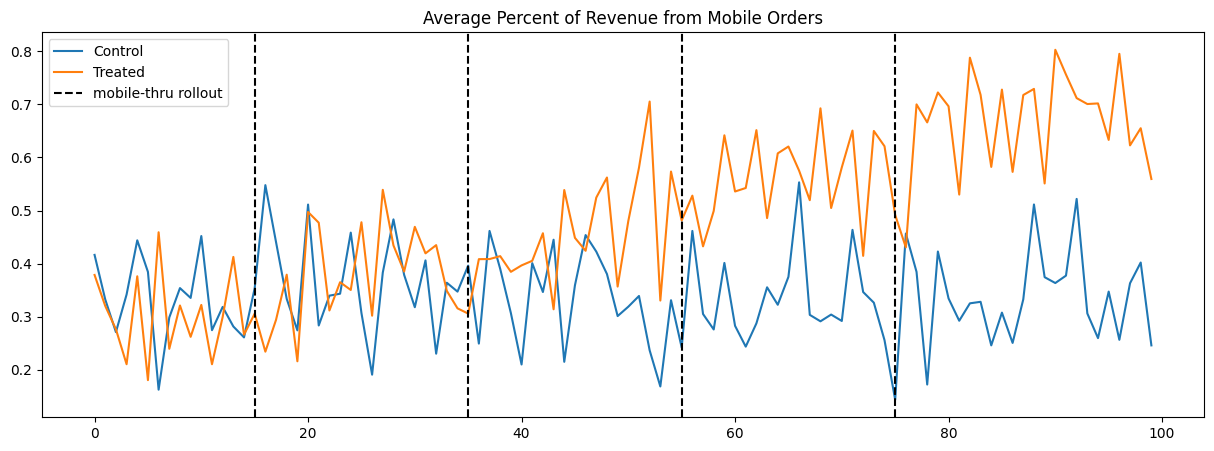

In [6]:
#| label: fig-eda-1
#| fig-cap: "Aggregated panel data plot showing average percent of revenue from mobile orders between treated and control units"

#Plot average trend
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(df.query("gets_treat == 0").groupby(['day_num'])['perc_rev_member'].mean().reset_index(drop=True), label="Control")
ax.plot(df.query("gets_treat == 1").groupby(['day_num'])['perc_rev_member'].mean().reset_index(drop=True), label="Treated")

ax.axvline(15, color='black', linestyle='dashed', label='mobile-thru rollout')
ax.axvline(35, color='black', linestyle='dashed')
ax.axvline(55, color='black', linestyle='dashed')
ax.axvline(75, color='black', linestyle='dashed')

ax.set_title("Average Percent of Revenue from Mobile Orders")
ax.legend();

The dotted black lines in @fig-eda-1 show the rollout dates for each of the restaurants in the study. As we approach the 100-day mark, the distance between the treated and control restaurants grows larger, indicating a potential treatment effect. To verify if this is true across all restaurants or if one restaurant is driving this change, we plot each region separately in @fig-eda-2.

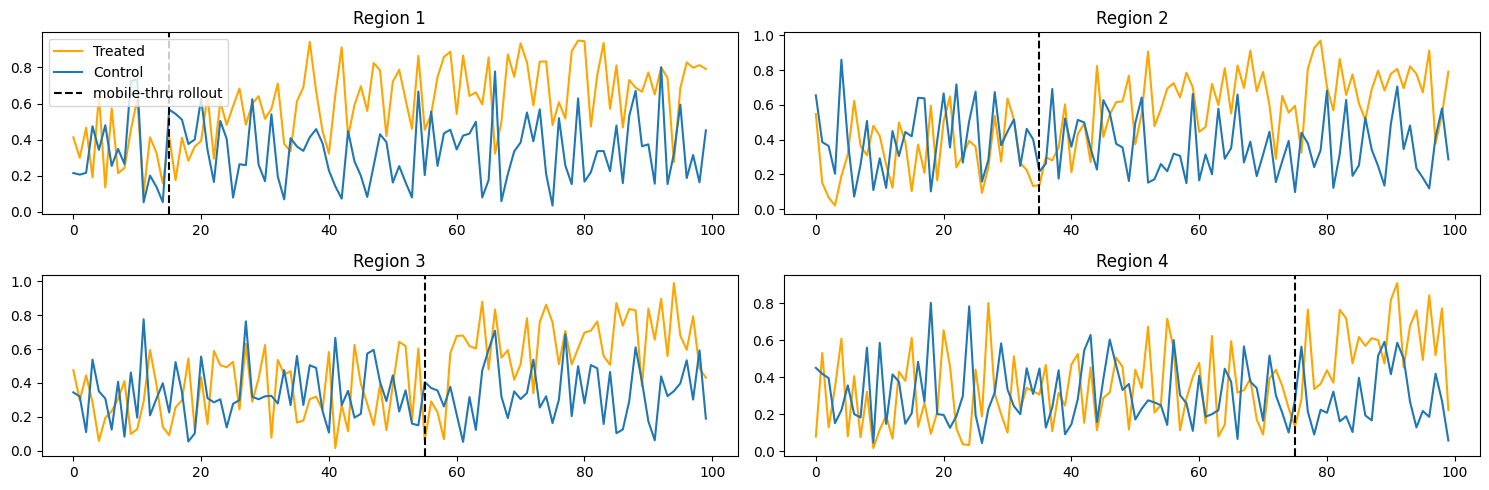

In [7]:
#| label: fig-eda-2
#| fig-cap: "Proportion of revenue generated by mobile orders between treated and control in each region"

#Plot each restaurant of treated vs control
fig, ax = plt.subplots(2, 2, figsize=(15,5))

ax[0,0].plot(df.query("store_id == 0").reset_index(drop=True)['perc_rev_member'], label='Treated', color='Orange')
ax[0,0].plot(df.query("store_id == 1").reset_index(drop=True)['perc_rev_member'], label='Control')
ax[0,0].axvline(15, color='black', linestyle='dashed', label='mobile-thru rollout')
ax[0,0].set_title("Region 1")
ax[0,0].legend()

ax[0,1].plot(df.query("store_id == 2").reset_index(drop=True)['perc_rev_member'], label='Treated', color='Orange')
ax[0,1].plot(df.query("store_id == 3").reset_index(drop=True)['perc_rev_member'], label='Control')
ax[0,1].axvline(35, color='black', linestyle='dashed')
ax[0,1].set_title("Region 2")

ax[1,0].plot(df.query("store_id == 4").reset_index(drop=True)['perc_rev_member'], label='Treated', color='Orange')
ax[1,0].plot(df.query("store_id == 5").reset_index(drop=True)['perc_rev_member'], label='Control')
ax[1,0].axvline(55, color='black', linestyle='dashed')
ax[1,0].set_title("Region 3")

ax[1,1].plot(df.query("store_id == 6").reset_index(drop=True)['perc_rev_member'], label='Treated', color='Orange')
ax[1,1].plot(df.query("store_id == 7").reset_index(drop=True)['perc_rev_member'], label='Control')
ax[1,1].axvline(75, color='black', linestyle='dashed')
ax[1,1].set_title("Region 4")

fig.tight_layout();

The graph above verifies that each region tested shows a growing gap between treated and control restaurants. As such, we'd like to quantify this gap to help Chick-fil-A know on average what a full mobile-thru rollout would do for driving an increase in mobile-app order usage.

# Calculating Causal Effect via Synthetic Difference-in-Difference (SDiD)

Since we are dealing with panel data, a hard date for treatment implementation, and no treatment rollback, a common approach to this would be using a *Difference-in-Differences* [@Card1994Minimum] estimator. However, recent studies have shown that in the case of potential heterogeneous treatment effects and staggered rollouts, this estimator can become biased [@Goodman-Bacon2021].

To handle such broken assumptions, one can use *Synthetic Control Method (SCM)* [@Abadie2010]. However, this approach lacks the ability to account for multiple treated units and staggered rollout dates. While we could perform four separate SCMs to generate causal inference, this method would fail to pool information acrosss all units to get a stable average treatment effect of the treated (ATT). Therefore, we need a framework that allows us to utilize all the information across our four regions that doesn't break when with staggered rollouts. 

In 2021, Dmitry Arkhangelsky, Susan Athey, David A. Hirshberg, Guido W. Imbens, and Stefan Wager published *Synthetic Difference-in-Differences (SDiD* [@Arkhangelsky2021]. This estimator combines the best of both worlds of DiD and SCM. For our purposes, it can handle multiple treated and control units, allows for staggered rollouts, and has a more robust counterfactual estimate since it uses weights from DiD and SCM.

## SDiD Model and Results

**Notice**: We'd like to recognize the work of [@Arkhangelsky2021] and the work of Matheus Facure [Facure:SynDiD]. We use Matheus's implementation of SDiD in our post and highly recommend that people read his book, [Causal Inference for The Brave and True](https://matheusfacure.github.io/python-causality-handbook/landing-page.html#). 

In most causal inference models, we are dealing with estimating what is happening versus what could have happened using the potential outcomes framework [@rubin1974estimating]. To do this in our analysis, we begin by deriving the SDiD estimator by showing the optimization equations for DiD and SCM in @eq-sdid-1.

$$
\hat{\tau}^{sc} = \underset{\beta, \tau}{argmin}  \bigg\{ \sum_{i=1}^N \sum_{t=1}^T \big(Y_{it} - \beta_t - \tau D_{it}\big)^2 \hat{w}^{sc}_i \bigg\}
$$
$$
\hat{\tau}^{did} = \underset{\mu, \alpha, \beta, \tau}{argmin} \bigg\{ \sum_{i=1}^N \sum_{t=1}^T \big(Y_{it} - (\mu + \alpha_i + \beta_t + \tau D_{it}\big)^2 \bigg\}
$${#eq-sdid-1}

The top equation is for SCM. In SCM, we attempt to find the parameters $\beta$ and $\tau$ that minimize the difference between the observed result $Y_{it}$. In DiD, we attempt to find parameters $\mu$, $\alpha$, $\beta$, and $\tau$ that minize the difference between the observed result $Y_{it}$. The goal in SCM is to generate a counterfactual that mimics the pre-treatment period for the treated unit. Likewise, in DiD, we use a control unit that mimics the behavior of the treated unit (i.e. follows the parallel trends assumption).

In SDiD, we merge the two equations together to get @eq-sdid-2. We describe each part of this equation in the list below.

$$
\hat{\tau}^{sdid} = \underset{\mu, \alpha, \beta, \tau}{argmin}  \bigg\{ \sum_{i=1}^N \sum_{t=1}^T \big(Y_{it} - (\mu + \alpha_i + \beta_t + \tau D_{it})^2 \hat{w}^{sdid}_i \hat{\lambda}^{sdid}_t \big) \bigg\}
$${#eq-sdid-2}

$$
\begin{split}
\hat{\lambda}^{sdid} = \underset{\lambda}{\mathrm{argmin}} \ ||\bar{\pmb{y}}_{post, co} - (\pmb{\lambda}_{pre} \pmb{Y}_{pre, co} +  \lambda_0)||^2_2 \\
\text{s.t } \ \sum \lambda_t = 1 \text{ and } \ \lambda_t > 0 \ \forall \ t
\end{split}
$${#eq-sdid-3}

$$
\begin{split}
\hat{w}^{sdid} = \underset{w}{\mathrm{argmin}} \ ||\bar{\pmb{y}}_{pre, tr} - (\pmb{Y}_{pre, co} \pmb{w}_{co} +  w_0)||^2_2 + \zeta^2 T_{pre} ||\pmb{w}_{co}||^2_2\\
\text{s.t } \ \sum w_i = 1 \text{ and } \ w_i > 0 \ \forall \ i
\end{split}
$${#eq-sdid-4}

- $Y_{it}$ is the actual outcome for restaurant $i$ at time $t$
- $\mu$ is the baseline of the counterfactual
- $\alpha_{i}$ is the fixed effect for the $i$th restaurant
- $\beta_{t}$ is the time fixed effect for time $t$
- $D_{it}$ is the treatment indicator (1 for treated, 0 for control)
- $\tau$ is the ATT
- $\hat{w_{i}}^{sdid}$ is the $ith$ unit weight from SCM
- $\hat{\lambda_{t}}^{sdid}$ is the $th$ time weight 

We won't go into too much detail with @eq-sdid-3 nor @eq-sdid-4, as they are mostly there for reference as to where those weights come from. The critical equation is @eq-sdid-2, which shows that it is a balanced combination of SCM and DiD. This means that SDiD finds optimal parameters that both estimate the treated unit's counterfactual trajectory. In short, the SDiD estimator becomes a doubly robust estimator for estimating ATT.

In particular, SDiD is a doubly robust estimator in staggered adoption designs. Because SDiD relies on block-matrix design (see [@Arkhangelsky2021] section 8 for more information), we adjust this block design by running SDiD four times across the four treated units while still comparing them across all the controls. After fitting our data to the SDiD estimator, we obtain the ATT shown below.

In [8]:
#Get cohort assignments
df = (df.assign(cohort_id = lambda x: x['store_id'] // 2)
 .assign(cohort_post_mobile = lambda x: np.where((x.cohort_id == 0) & (x.day_num > 15), 1, 
                                                np.where((x.cohort_id == 1) & (x.day_num > 35), 1, 
                                                        np.where((x.cohort_id == 2) & (x.day_num > 55), 1, 
                                                                np.where((x.cohort_id == 3) & (x.day_num > 75), 1, 0)))))
)

In [9]:
#Calculate time weights
def fit_time_weights(data, outcome_col, day_col, store_col, treat_col, post_col):
    control = data.query(f"{treat_col} == 0")
    
    y_pre = (control
             .query(f"{post_col} == 0")
             .pivot(columns=day_col, index=store_col, values=outcome_col))
    
    y_post_mean = (control
                   .query(f"{post_col} == 1")
                   .groupby([store_col])
                   [outcome_col]
                   .mean()
                   .values
                   .reshape(-1,1))
    
    X = np.concatenate([np.ones((1, y_pre.shape[1])), y_pre.values], axis=0)
    
    w = cp.Variable(X.shape[0])
    objective = cp.Minimize(cp.sum_squares(w@X - y_post_mean))
    constraints = [cp.sum(w[1:]) == 1, w[1:] >= 0]
    problem = cp.Problem(objective, constraints)
    problem.solve(verbose=False)
    
    return pd.Series(w.value[1:], 
                     name="time_weights", 
                     index=y_pre.index)

In [10]:
#Calculate regularization
def calc_reg(data, outcome_col, day_col, store_col, treat_col, post_col):
    n_treated_post = data.query(f"{post_col} == 1").query(f"{treat_col} == 1").shape[0]
    
    first_diff_std = (data
                      .query(f"{post_col} == 0")
                      .query(f"{treat_col} == 0")
                      .sort_values(day_col)
                      .groupby(store_col)
                      [outcome_col]
                      .diff()
                      .std())
    
    return n_treated_post**(1/4) * first_diff_std

In [11]:
#Calculate unit weights
def fit_unit_weights(data, outcome_col, day_col, store_col, treat_col, post_col):
    
    zeta = calc_reg(data, outcome_col, day_col, store_col, treat_col, post_col)
    pre_data = data.query(f"{post_col} == 0")
    
    y_pre_control = (pre_data
                     .query(f"{treat_col} == 0")
                     .pivot(columns=day_col, index=store_col, values=outcome_col))
    
    y_pre_treat_mean = (pre_data
                        .query(f"{treat_col} == 1")
                        .groupby(day_col)
                        [outcome_col]
                        .mean())
    
    T_pre = y_pre_control.shape[0]
    X = np.concatenate([np.ones((T_pre, 1)), y_pre_control.values], axis=1) 
    
    w = cp.Variable(X.shape[1])
    objective = cp.Minimize(cp.sum_squares(X@w - y_pre_treat_mean.values) + T_pre*zeta**2 * cp.sum_squares(w[1:]))
    constraints = [cp.sum(w[1:]) == 1, w[1:] >= 0]
    
    problem = cp.Problem(objective, constraints)
    problem.solve(verbose=False)
    
    return pd.Series(w.value[1:],
                     name="unit_weights",
                     index=y_pre_control.columns)

In [12]:
#Join weights for easier computation
def join_weights(data, unit_w, time_w, day_col, store_col, treat_col, post_col):
    return (
        data
        .set_index([day_col, store_col])
        .join(time_w)
        .join(unit_w)
        .reset_index()
        .fillna({time_w.name: 1 / len(pd.unique(data.query(f"{post_col} == 1")[day_col])),
                 unit_w.name: 1 / len(pd.unique(data.query(f"{treat_col} == 1")[store_col]))})
        .assign(**{"weights": lambda d: (d[time_w.name] * d[unit_w.name]).round(10)})
        .astype({treat_col: int, post_col: int}))

In [13]:
#Create SDID function
def synthetic_diff_in_diff(data, outcome_col, day_col, store_col, treat_col, post_col):
    
    unit_weights = fit_unit_weights(data,
                                    outcome_col=outcome_col,
                                    day_col=day_col,
                                    store_col=store_col,
                                    treat_col=treat_col,
                                    post_col=post_col)
    
    time_weights = fit_time_weights(data,
                                    outcome_col=outcome_col,
                                    day_col=day_col,
                                    store_col=store_col,
                                    treat_col=treat_col,
                                    post_col=post_col)

    did_data = join_weights(data, unit_weights, time_weights,
                            day_col=day_col,
                            store_col=store_col,
                            treat_col=treat_col,
                            post_col=post_col)
    
    formula = f"{outcome_col} ~ {post_col}*{treat_col}"
    did_model = smf.wls(formula, data=did_data, weights=did_data["weights"]+1e-10).fit()
    
    return did_model.params[f"{post_col}:{treat_col}"]

In [14]:
#Define staggered rollout dict
rollout_dict = {
    15: 0,
    35: 1,
    55: 2,
    75: 3
}

In [15]:
#Get staggered effects
stag_eff = {day: synthetic_diff_in_diff(df.query(f"cohort_id == {cohort}"),
                            outcome_col="perc_rev_member", 
                            day_col="day_num", 
                            store_col="store_id", 
                            treat_col="gets_treat", 
                            post_col="cohort_post_mobile")
 for day, cohort in rollout_dict.items()
}

In [16]:
#Calculate weights for each ATT
weights_att = {day: df.query(f"store_id == {store}")['has_mobile'].sum() for day, store in {15: 0, 35: 2, 55: 4, 75: 6}.items()}

In [17]:
#Calculate ATT
att = sum([eff*weights_att[day]/sum(weights_att.values()) for day, eff in stag_eff.items()])

In [18]:
#Print ATT
print(f"ATT: {att}")

ATT: 0.3035668498514986


Our ATT indicates that restaurants that have implemented the mobile-thru have, on average, about a 0.31 increase in the proportion of revenue generated from mobile orders. This is a major increase! Previously, drive-thrus had, on average, about 30% of revenue from mobile orders. Now, with mobile-thrus, this number is basically double.

**Note**: In a more thorough analysis (and obviously with real data), we'd want to verify this ATT by performing other statistical tests and reporting relevant statistical measures. However, since this is synthetic data for a synthetic example, it suffices to show that the SDiD correctly uncovered the underlying causal mechanism, accounting for confounding effects and properly handling the staggered rollout.

# From Causal Modeling to Business Strategy

At the end of the day, causal modeling is merely a tool to inform business strategy. Knowing that mobile-thrus in our small experiment increased the proportion of mobile orders is great, but what should we do with this information? What are the available resources and capabilities of Chick-fil-A to maximize this opportunity?

As mentioned earlier in the post, Chick-fil-A has been increasingly focused on improving the drive-thru to make it the go-to spot for speed and accuracy. Furthermore, Chick-fil-A has been investing a lot into their digital touchpoints with customers via their mobile application. With these two main focuses and the result of the mobile-thru experiment, Chick-fil-A is well positioned to merge these two worlds to **maximize its value chain** [@Porter1985].

![The Value Chain](https://www.cisl.cam.ac.uk/files/media/the-value-chain.jpg)

The value chain consists of the intentional steps a business takes to provide a good or service to its customers. In our case, Chick-fil-A is aiming to provide food to its customers in a friendly and efficient way, particularly through the drive-thru.

The combination of the mobile app with the mobile-thru provides a new way for Chick-fil-A to operationalize their business. These changes can be summarized in two areas below.

## Operational Efficiency

The increase in mobile orders means increased insight into customer purchase patterns. We can now know the minute of the day, distance, and preference of food for each individual customer. Since we have a more accurate picture into what customers are looking to purchase, we can leverage predictive analytics to more accurately forecast our supply chain needs and workforce management.

Furthermore, since we have continuous feedback from customers, these models can be continuously updated to match the current trends and preferences of customers. By planning our resources around this new reliable source of data, Chick-fil-A can enhance operational efficiency to drive profits. 

## Personalized Customer Experience

The app gives incredible insight into each customer's tastes and preferences. As more users continue to go into the app, we can get better insights into different customer demographics and activities. Using those insights, we can better personalize deals and opportunities. We can understand the timing of sending promotions, different app layouts to maximize customer checkout throughput, etc. There are a plethora of ways Chick-fil-A can leverage this new digital touchpoint to better position themselves to provide maximum value to their customers.

# Conclusion

In this post, we reviewed the rich history of Chick-fil-A, its current drive-thru strategy, and a potential new avenue with mobile-thrus. We used queue theory to analyze the current system and the potential changes in drive-thru efficiency by implementing a mobile-thru. We then designed an experiment to test this mobile-thru and used the SDiD estimator to extract a causal effect. After calculating this causal effect, we used it to guide our business strategy to improve two areas of our business: operational efficiency and customer experience personalization.

Overall, we hope this post illustrated the importance of combining causal models with business strategy. Causality is most useful when implemented in a framework of business strategy, and business strategy is most robust when tested via rigorous and robust models. The combination of both can provide great results for any business.